In [11]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [14]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-72.922561257762 -4.034855403409807
-28.366684150531746 32.23164483411054
-89.1598229531932 113.64113003051153
-75.28124747827825 -176.68465207427354
74.65248784127601 -136.66389721653866
-45.98907033442633 165.8798378683482
10.754489920786142 29.23060833888715
-20.351073947495536 -23.54216853271842
-23.61119594043153 137.8063096014202
-43.164301780480365 -153.1405237074664
-14.912663959157982 -118.36912259414336
-14.41138398588771 144.0769279813603
89.99153334817026 43.69737048491231
-10.594800363829833 6.8729598069728866
58.00239686070907 -146.16031583082173
1.5200242767141674 78.16587141204195
-65.94869539639983 -133.6719041427534
74.9943230764228 -163.36097568821413
-63.0585232622836 24.206046303844857
0.5736758625249365 41.69723957102195
45.29101480231125 -168.21780317276182
3.6316842712598003 -154.74160892404018
62.37463069960501 -95.04526112429866
77.55756035650288 153.1160523493981
43.059205072188206 -43.02449779933451
42.27692292967353 13.963133411686073
48.102734074004985 -17

In [15]:
from citipy import citipy

In [16]:
# Create a list for holding the cities
cities = []
# Identify the nearest citi for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, the we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

578

In [17]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [18]:
# Build the basic URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4886b7273f273c59ab7b181d18b105f8


In [19]:
# Import the time library and the datetime module from the datetine library
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logginf purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count +=1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City" : city.title(),
                         "Lat" : city_lat,
                         "Lng" : city_lng,
                         "Max Temp" : city_max_temp,
                         "Humidity" : city_humidity,
                         "Cloudiness" : city_clouds,
                         "Wind Speed" : city_wind,
                         "Country" : city_country,
                         "Date" : city_date})
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate the Data Loading is complete
print("---------------------------")
print("Date Retrieval Complete    ")
print("---------------------------")

        



Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | richards bay
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | tuatapere
Processing Record 7 of Set 1 | kaduqli
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | mount isa
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | mareeba
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | luanda
Processing Record 15 of Set 1 | palmer
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | afmadu
City not found. Skipping...
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | thomps

Processing Record 39 of Set 4 | koumac
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | igunga
Processing Record 42 of Set 4 | lebu
Processing Record 43 of Set 4 | chuy
Processing Record 44 of Set 4 | ribeira grande
Processing Record 45 of Set 4 | kruisfontein
Processing Record 46 of Set 4 | fomboni
Processing Record 47 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 48 of Set 4 | chisindia
Processing Record 49 of Set 4 | cidreira
Processing Record 50 of Set 4 | el faiyum
City not found. Skipping...
Processing Record 1 of Set 5 | barawe
City not found. Skipping...
Processing Record 2 of Set 5 | saint-philippe
Processing Record 3 of Set 5 | vung tau
Processing Record 4 of Set 5 | kenora
Processing Record 5 of Set 5 | tiarei
Processing Record 6 of Set 5 | djibo
Processing Record 7 of Set 5 | mattru
Processing Record 8 of Set 5 | saint-francois
Processing Record 9 of Set 5 | kulhudhuffushi
Processing Record 10 of Set 5 | 

Processing Record 25 of Set 8 | matagami
Processing Record 26 of Set 8 | svetlaya
Processing Record 27 of Set 8 | jalingo
Processing Record 28 of Set 8 | hun
Processing Record 29 of Set 8 | lavrentiya
Processing Record 30 of Set 8 | ofaqim
Processing Record 31 of Set 8 | manokwari
Processing Record 32 of Set 8 | ayagoz
Processing Record 33 of Set 8 | vikhorevka
Processing Record 34 of Set 8 | la grande
Processing Record 35 of Set 8 | ajdabiya
Processing Record 36 of Set 8 | benguela
Processing Record 37 of Set 8 | salinas
Processing Record 38 of Set 8 | chara
Processing Record 39 of Set 8 | channel-port aux basques
Processing Record 40 of Set 8 | berdigestyakh
Processing Record 41 of Set 8 | marsabit
Processing Record 42 of Set 8 | novikovo
Processing Record 43 of Set 8 | malangwa
Processing Record 44 of Set 8 | disna
Processing Record 45 of Set 8 | quelimane
Processing Record 46 of Set 8 | santa lucia
Processing Record 47 of Set 8 | axim
Processing Record 48 of Set 8 | brainerd
Proces

Processing Record 11 of Set 12 | sakaiminato
Processing Record 12 of Set 12 | kinsale
Processing Record 13 of Set 12 | sabang
Processing Record 14 of Set 12 | laguna
Processing Record 15 of Set 12 | sydney mines
Processing Record 16 of Set 12 | bourail
Processing Record 17 of Set 12 | san cristobal
Processing Record 18 of Set 12 | atocha
Processing Record 19 of Set 12 | binzhou
Processing Record 20 of Set 12 | telde
Processing Record 21 of Set 12 | mount gambier
Processing Record 22 of Set 12 | minot
Processing Record 23 of Set 12 | whitianga
Processing Record 24 of Set 12 | turka
Processing Record 25 of Set 12 | linjiang
Processing Record 26 of Set 12 | timra
Processing Record 27 of Set 12 | marawi
Processing Record 28 of Set 12 | harlingen
---------------------------
Date Retrieval Complete    
---------------------------


In [22]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,58.80,87,100,18.05,ZA,2022-10-15 04:54:40
1,Richards Bay,-28.7830,32.0377,71.94,72,99,11.52,ZA,2022-10-15 05:02:11
2,Albany,42.6001,-73.9662,46.38,88,0,2.51,US,2022-10-15 04:54:29
3,Vaini,-21.2000,-175.2000,80.76,78,20,10.36,TO,2022-10-15 04:54:24
4,Tuktoyaktuk,69.4541,-133.0374,28.42,76,100,20.51,CA,2022-10-15 05:02:12


In [23]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-10-15 04:54:40,-34.4187,19.2345,58.80,87,100,18.05
1,Richards Bay,ZA,2022-10-15 05:02:11,-28.7830,32.0377,71.94,72,99,11.52
2,Albany,US,2022-10-15 04:54:29,42.6001,-73.9662,46.38,88,0,2.51
3,Vaini,TO,2022-10-15 04:54:24,-21.2000,-175.2000,80.76,78,20,10.36
4,Tuktoyaktuk,CA,2022-10-15 05:02:12,69.4541,-133.0374,28.42,76,100,20.51


In [24]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [26]:
# Import the time module
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/14/22'

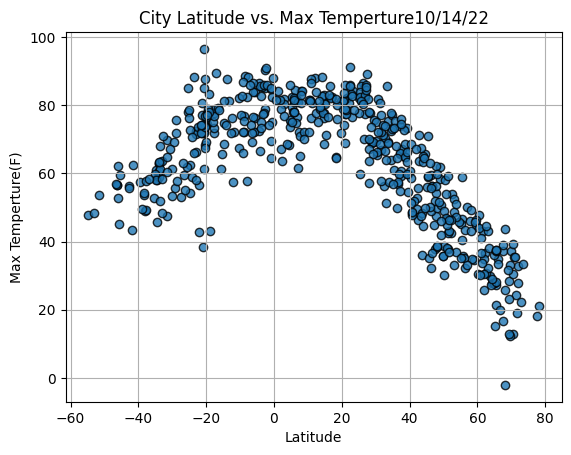

In [27]:
# Build the scatter plot for latitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(F"City Latitude vs. Max Temperture" + time.strftime("%x"))
plt.ylabel("Max Temperture(F)")
plt.xlabel("Latitude")
plt.grid(True)


#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

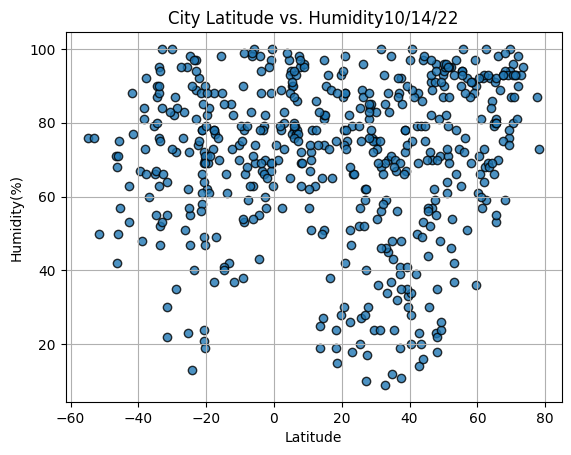

In [28]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(F"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)


#Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

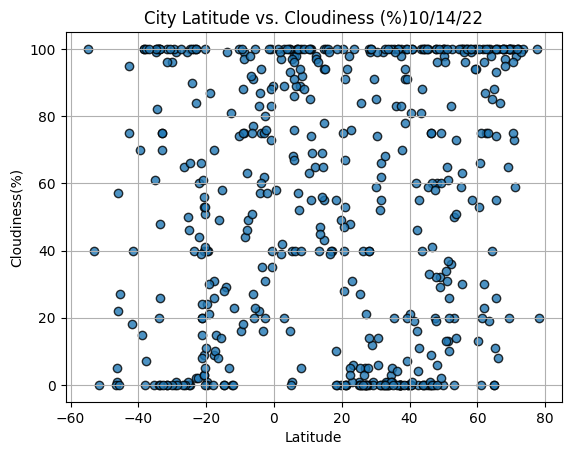

In [29]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(F"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)


#Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

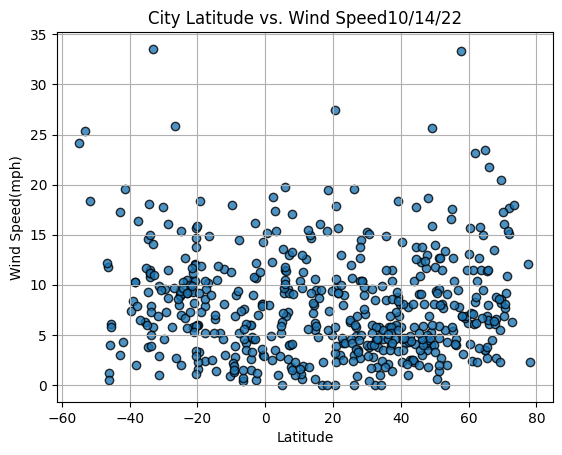

In [30]:
# Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(F"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)


#Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()